In [1]:
import numpy as np 
import h5py 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (5.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' #ipython很好用，但是如果在ipython里已经import过的模块修改后需要重新reload就需要这样 
#在执行用户代码前，重新装入软件的扩展和模块。 
%load_ext autoreload 
#autoreload 2：装入所有 %aimport 不包含的模块。 
%autoreload 2 np.random.seed(1) #指定随机种子


d:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
arr3D = np.array([[[1, 1, 2, 2, 3, 4], 
                   [1, 1, 2, 2, 3, 4], 
                   [1, 1, 2, 2, 3, 4]], 
                  
                  [[0, 1, 2, 3, 4, 5], 
                   [0, 1, 2, 3, 4, 5], 
                   [0, 1, 2, 3, 4, 5]],
                  
                  [[1, 1, 2, 2, 3, 4], 
                   [1, 1, 2, 2, 3, 4], 
                   [1, 1, 2, 2, 3, 4]]
                 ]) 
print( 'constant:  \n' + str(np.pad(arr3D, ((0, 0), (1, 1), (2, 2)), 'constant',constant_values = (0,0))))


constant:  
[[[0 0 0 0 0 0 0 0 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0]
  [0 0 0 1 2 3 4 5 0 0]
  [0 0 0 1 2 3 4 5 0 0]
  [0 0 0 1 2 3 4 5 0 0]
  [0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 1 1 2 2 3 4 0 0]
  [0 0 0 0 0 0 0 0 0 0]]]


In [11]:
# 默认以0填充x图像边界
def padding(x,pad,value = 0):
    
    x_padded = np.pad(x,
                      ((0,0),
                     (1,1),
                     (1,1),
                     (0,0)),
                      'constant',
                      constant_values = (value,value))
    
    return x_padded

x.shape = (4, 3, 3, 2)
x_paded.shape = (4, 5, 5, 2)
x[1, 1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_paded[1, 1] = [[ 0.          0.        ]
 [ 0.04221375  0.58281521]
 [-1.10061918  1.14472371]
 [ 0.90159072  0.50249434]
 [ 0.          0.        ]]


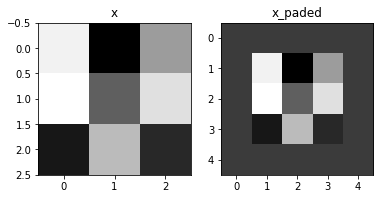

In [16]:
# 测试padding function
np.random.seed(1) 
x = np.random.randn(4,3,3,2) 
x_paded = padding(x,2) 
#查看信息 
print ("x.shape =", x.shape) 
print ("x_paded.shape =", x_paded.shape) 
print ("x[1, 1] =", x[1, 1]) 
print ("x_paded[1, 1] =", x_paded[1, 1]) 
#绘制图 
fig , axarr = plt.subplots(1,2)
#一行两列 
axarr[0].set_title('x') 
axarr[0].imshow(x[0,:,:,0]) 
axarr[1].set_title('x_paded') 
axarr[1].imshow(x_paded[0,:,:,0])

In [21]:
def conv_single_step(a_slice_prev,W,b):
    s = np.multiply(a_slice_prev,W) + b
    z = np.sum(s)
    return z

In [22]:
# 测试single_step_conv
np.random.seed(1) 
#这里切片大小和过滤器大小相同 
a_slice_prev = np.random.randn(4,4,3) 
W = np.random.randn(4,4,3) 
b = np.random.randn(1,1,1) 
Z = conv_single_step(a_slice_prev,W,b)
print('z= %s' %(Z))

z -23.16021220252078
